Predicting Shopping Mall Sales. You will have to create a model to predict
revenue. Identify the model with the best params. Target Column -
Revenue. 
 Data Link -
https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/Shopping_Revenue.csv

In [180]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_val_score




from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor



from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as abs



In [181]:
df=pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/Shopping_Revenue.csv")

In [182]:
df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [183]:
print("Number of rows in the data :: ",df.shape[0])
print("Number of columns in the data :: ",df.shape[1])
print("Number of unique cities in the data :: ",df['City'].nunique())

Number of rows in the data ::  137
Number of columns in the data ::  43
Number of unique cities in the data ::  34


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          133 non-null    float64
 11  P7          133 non-null    float64
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [185]:
df.describe(include='all')

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137,137,137,137,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
unique,NaN,134,34,2,3,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2/23/2010,İstanbul,Big Cities,FC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,78,76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.000000,NaN,NaN,NaN,NaN,4.014599,4.408759,4.317518,4.372263,2.007299,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,NaN,NaN,NaN,NaN,2.910391,1.514900,1.032337,1.016462,1.209620,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,4.000000,4.000000,1.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,NaN,NaN,NaN,NaN,3.000000,5.000000,4.000000,4.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,NaN,NaN,NaN,NaN,4.000000,5.000000,5.000000,5.000000,2.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06


In [186]:
df.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [187]:
df['P6']=df['P6'].fillna(df['P6'].mean())
df['P7']=df['P7'].fillna(df['P7'].mean())


In [188]:
set(df.isnull().sum())

{0}

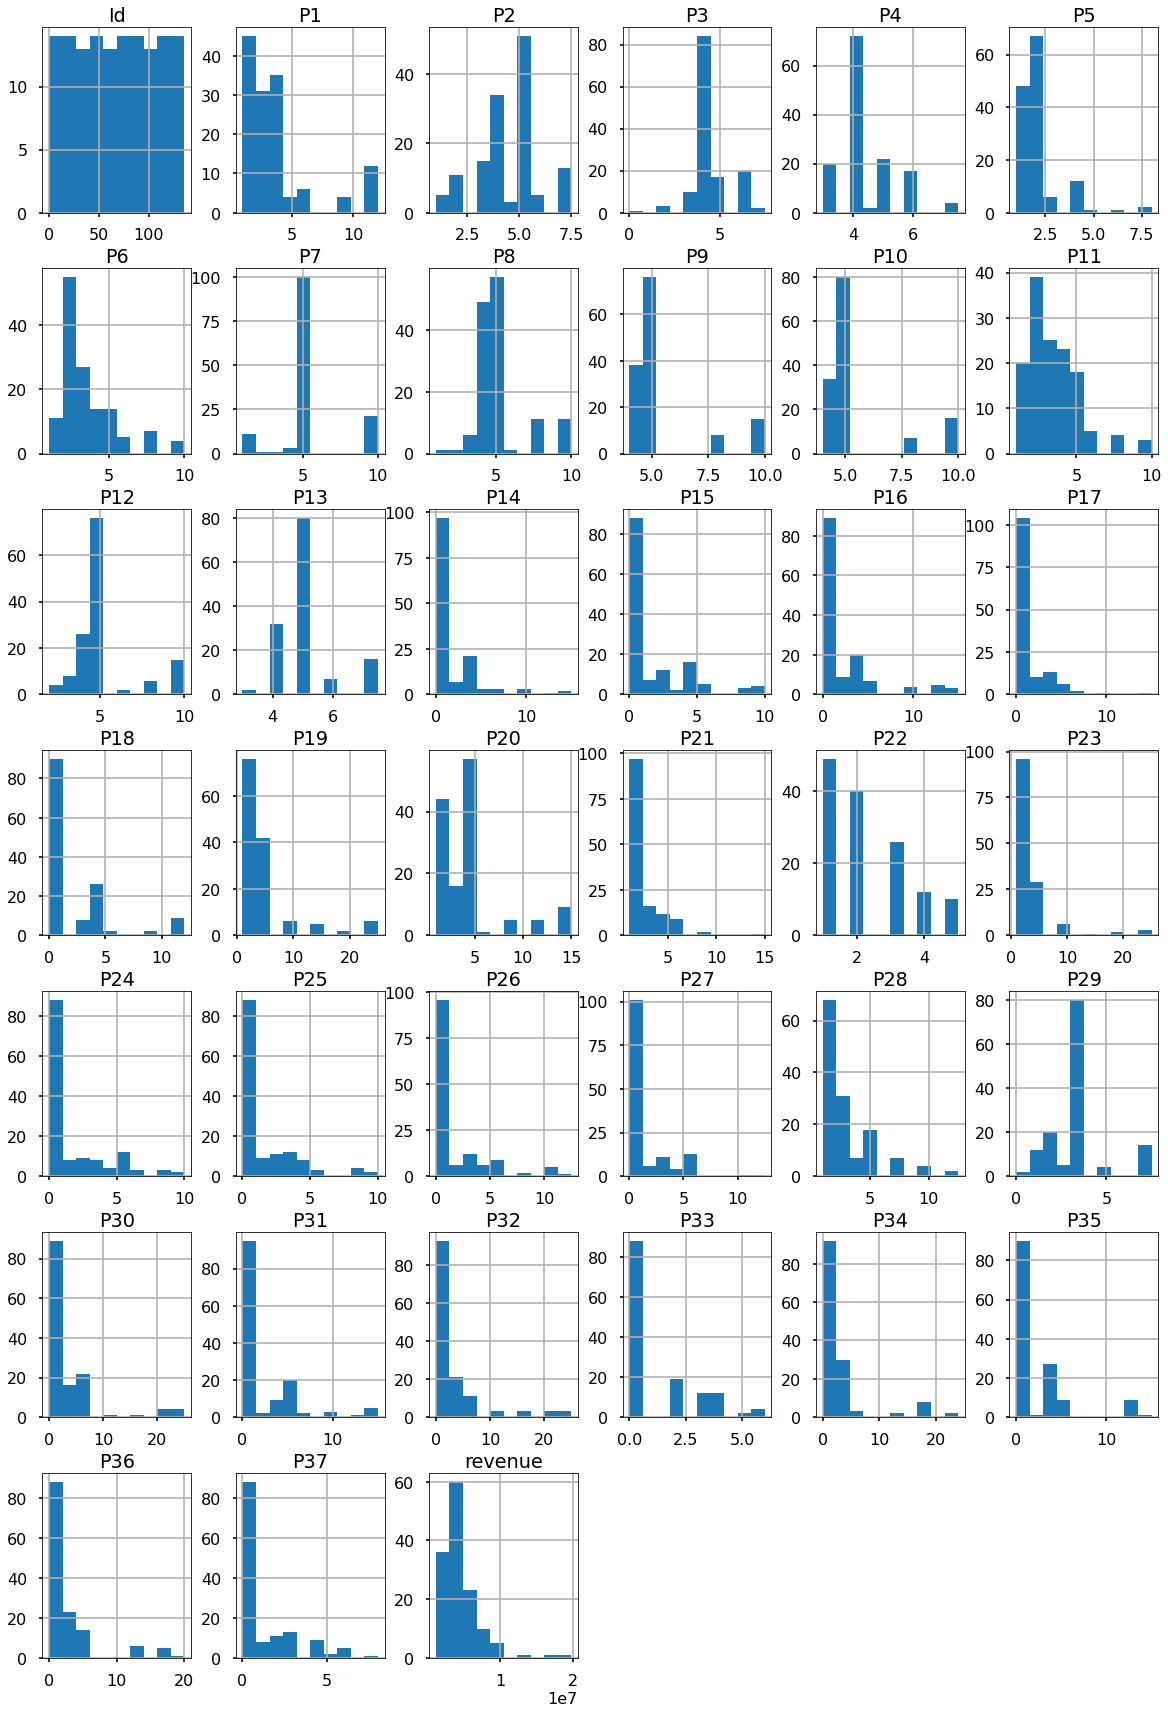

In [189]:
rcParams['figure.figsize'] = 20,30
df.hist()
plt.show()

In [190]:
#Creating some new columns(open year , Older shopping mall) for data visualistion
from datetime import date
today_date=date.today()
year=today_date.year
df['open year']=df['Open Date'].apply(lambda x:int(x.split('/')[2]))
df['Older_shopping_mall']=year-df['open year']

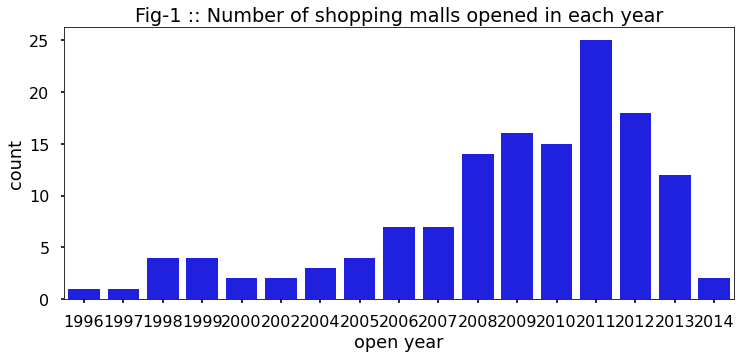

In [191]:
plt.figure(figsize=(12,5))
plt.style.use('seaborn-poster')
sns.countplot(x='open year',data=df,color='blue')
plt.title("Fig-1 :: Number of shopping malls opened in each year")
plt.show()

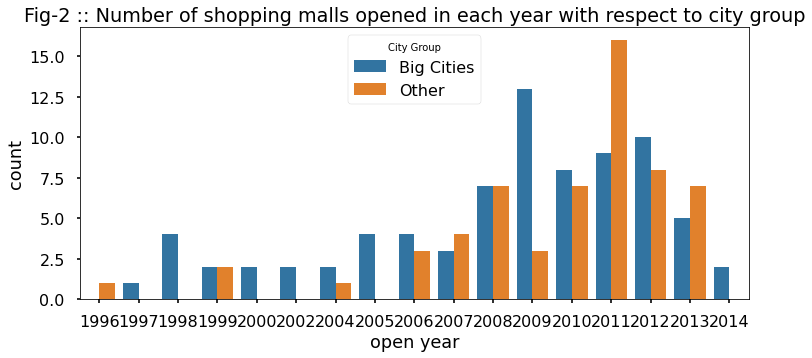

In [192]:
plt.figure(figsize=(12,5))
plt.style.use('seaborn-poster')
sns.countplot(x='open year',data=df,hue='City Group')
plt.title("Fig-2 :: Number of shopping malls opened in each year with respect to city group")
plt.show()

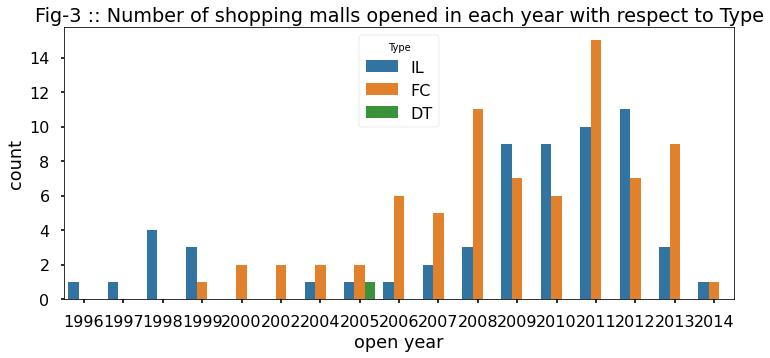

In [193]:
plt.figure(figsize=(12,5))
plt.style.use('seaborn-poster')
sns.countplot(x='open year',data=df,hue='Type')
plt.title("Fig-3 :: Number of shopping malls opened in each year with respect to Type")
plt.show()

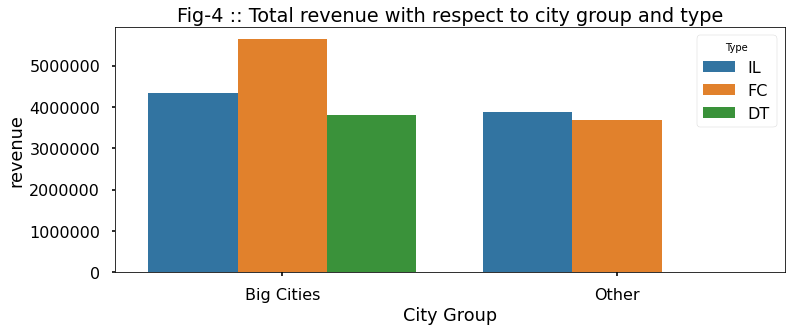

In [194]:
plt.figure(figsize=(12,4.5))
plt.style.use('seaborn-poster')
sns.barplot(x="City Group",y="revenue",hue='Type',data=df,ci=None)
plt.ticklabel_format(axis='y', style='plain',useOffset=None)
plt.title("Fig-4 :: Total revenue with respect to city group and type")
plt.show()


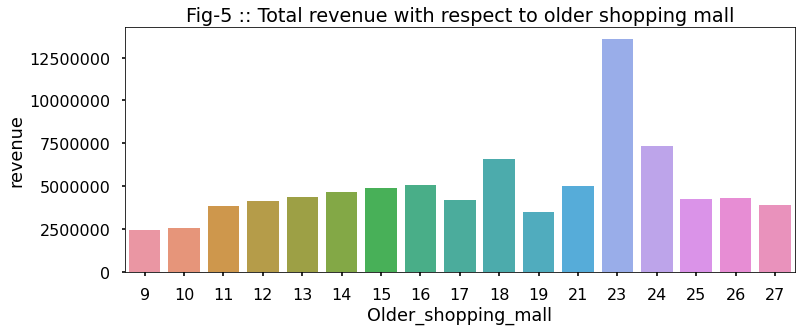

In [195]:
plt.figure(figsize=(12,4.5))
plt.style.use('seaborn-poster')
sns.barplot(x="Older_shopping_mall",y="revenue",data=df,ci=None)
plt.ticklabel_format(axis='y', style='plain',useOffset=None)
plt.title("Fig-5 :: Total revenue with respect to older shopping mall")
plt.show()

In [196]:
big_city_df=df.loc[df['City Group']=='Big Cities']

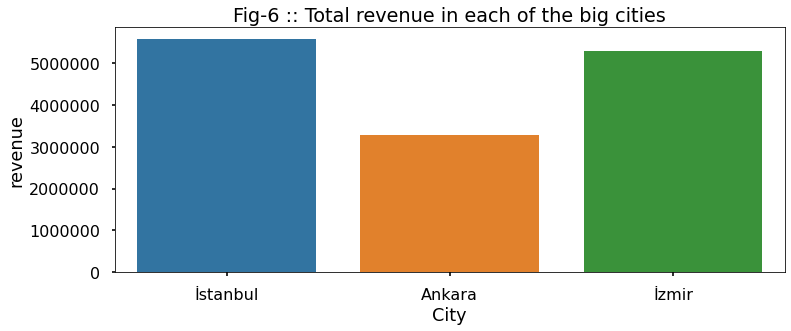

In [197]:
plt.figure(figsize=(12,4.5))
plt.style.use('seaborn-poster')
sns.barplot(x="City",y="revenue",data=big_city_df,ci=None)
plt.ticklabel_format(axis='y', style='plain',useOffset=None)
plt.title("Fig-6 :: Total revenue in each of the big cities")
plt.show()

In [198]:
other_city_df=df.loc[df['City Group']=='Other']

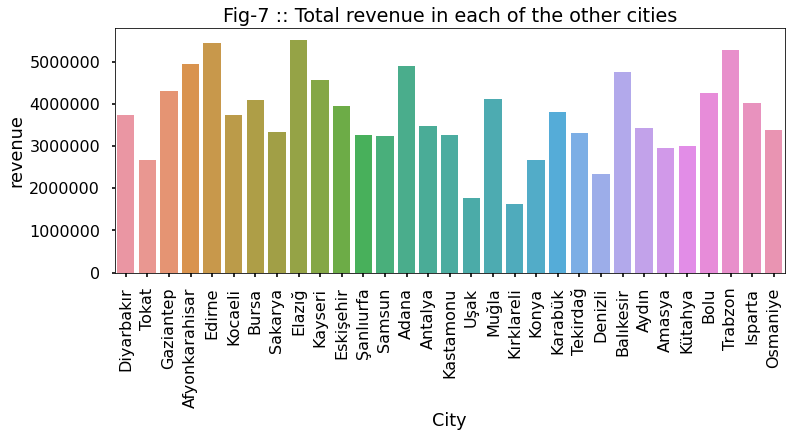

In [199]:
plt.figure(figsize=(12,4.5))
plt.style.use('seaborn-poster')
sns.barplot(x="City",y="revenue",data=other_city_df,ci=None)
plt.ticklabel_format(axis='y', style='plain',useOffset=None)
plt.xticks(rotation='vertical')
plt.title("Fig-7 :: Total revenue in each of the other cities")
plt.show()

In [200]:
# handling categorical values
final_data=pd.get_dummies(df,columns=['City Group','Type'])

In [201]:
#Removing unwanted columns
final_data=final_data.drop(['Id', 'Open Date', 'City','open year'],axis=1)

# splitting data

In [202]:
x=final_data.drop('revenue',axis=1)
y=final_data['revenue']

In [203]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# XGB Regression

In [204]:
xgb=XGBRegressor()
xgb.fit(x_train,y_train)

[11:14:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [205]:
xgb_score=xgb.score(x_test,y_test)
print(xgb_score)

0.09566658590848676


In [206]:
pred_by_xgb=xgb.predict(x_test)
print(f'GBR RMSE: {np.sqrt(mse(y_test,pred_by_xgb))}')
print(f'GBR ABS: {np.sqrt(abs(y_test,pred_by_xgb))}')

GBR RMSE: 3326192.840588502
GBR ABS: 1369.396595480756


# knn regression

In [207]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [208]:
knn_score=knn.score(x_test,y_test)
print(knn_score)

-0.09111665483724218


In [209]:
pred_by_knn=knn.predict(x_test)
print(f'GBR RMSE: {np.sqrt(mse(y_test,pred_by_knn))}')
print(f'GBR ABS: {np.sqrt(abs(y_test,pred_by_knn))}')

GBR RMSE: 3653580.897899915
GBR ABS: 1415.514550563555


#  Adaboost Regression

In [210]:
abboost=AdaBoostRegressor()
abboost.fit(x_train,y_train)

AdaBoostRegressor()

In [211]:
abboost_score=abboost.score(x_test,y_test)
print(abboost_score)

0.02126508094779289


In [212]:
pred_by_AdaBoost=abboost.predict(x_test)
print(f'GBR RMSE: {np.sqrt(mse(y_test,pred_by_AdaBoost))}')
print(f'GBR ABS: {np.sqrt(abs(y_test,pred_by_AdaBoost))}')

GBR RMSE: 3460315.3328580637
GBR ABS: 1383.703231640159


# Random forest

In [213]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [214]:
rf_score=rf.score(x_test,y_test)
print(rf_score)

0.08598218380494937


In [215]:
pred_by_RF=rf.predict(x_test)
print(f'GBR RMSE: {np.sqrt(mse(y_test,pred_by_RF))}')
print(f'GBR ABS: {np.sqrt(abs(y_test,pred_by_RF))}')

GBR RMSE: 3343955.3206559164
GBR ABS: 1350.22834140325


# Feature selection

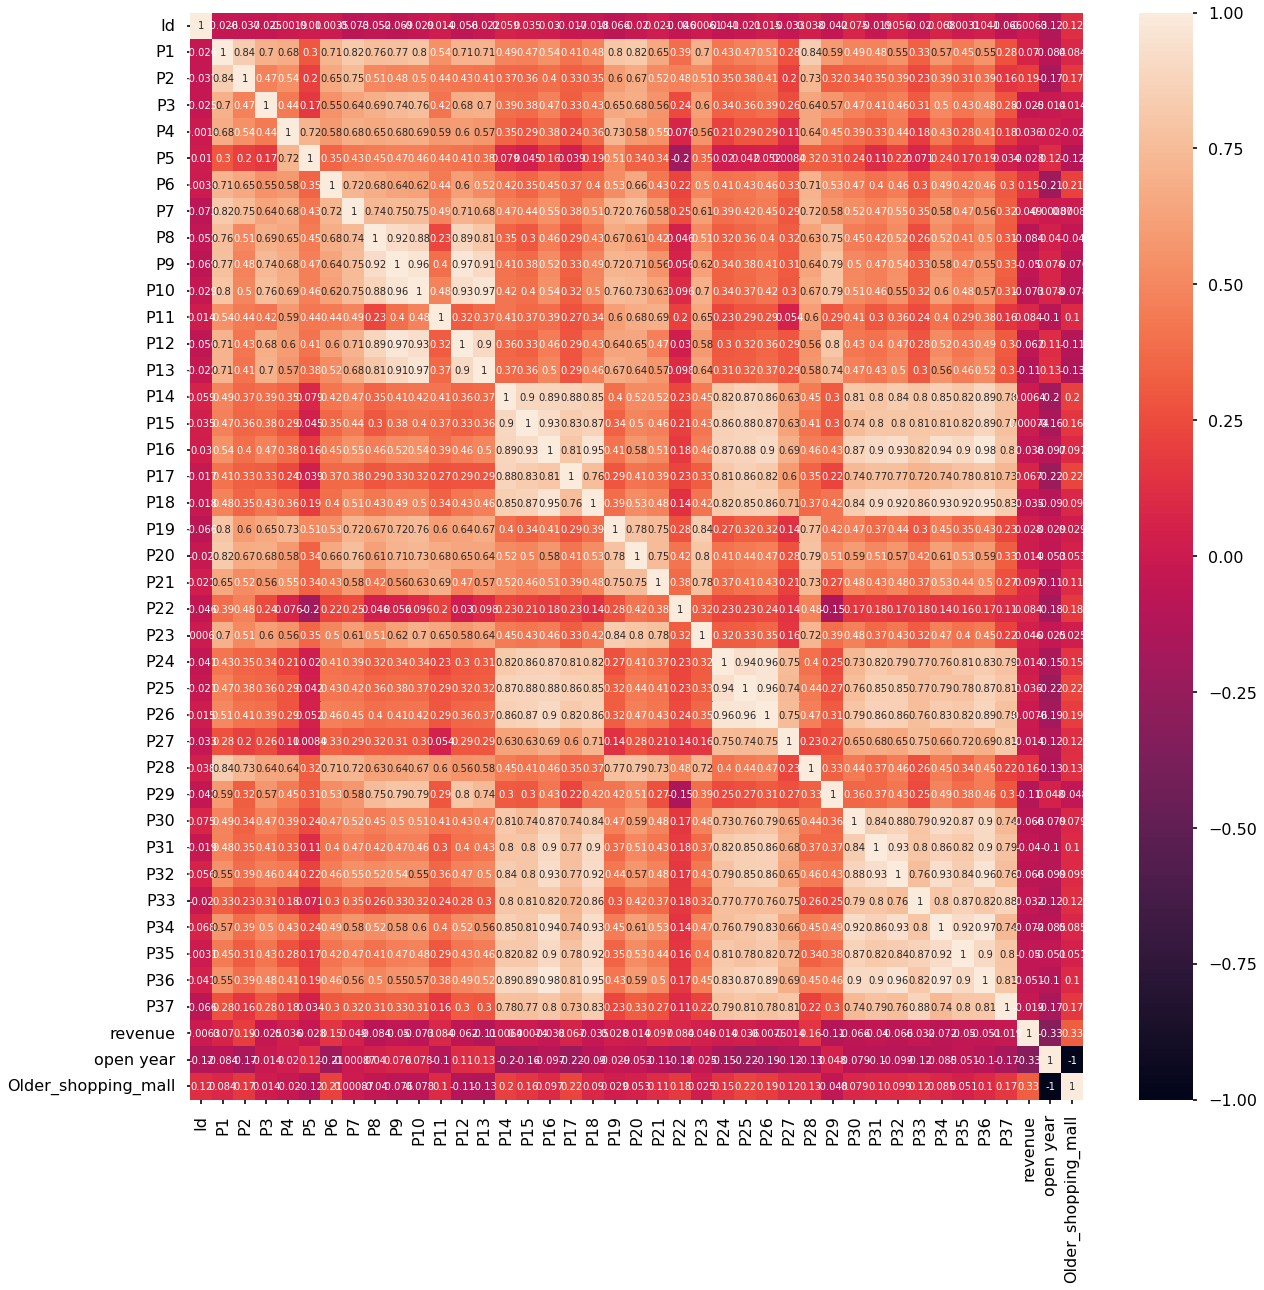

In [217]:
plt.figure(figsize=(20,20))
cor=df.corr()
sns.heatmap(cor,annot=True)

**Conclusion:**

Applied four different regression models but got less mean squared error with Random Forest Regressor